In [251]:
#Install necesary Tensorflow and Keras libraries
#!pip install tensorflow
#!pip install opencv-python

In [252]:
#Import necesary libraries  & modules
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

2.10.0


In [253]:
#Create mock data
fashion_mnist = keras.datasets.fashion_mnist
#Load data and split it into train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

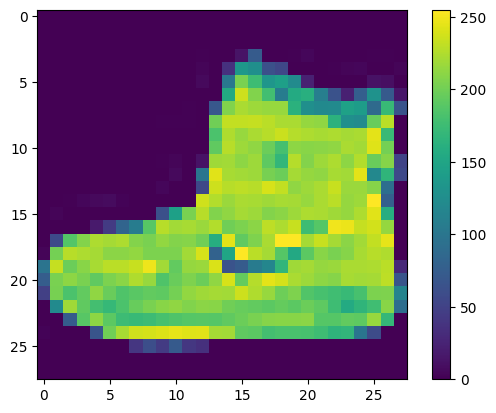

In [254]:
#Show the shape of the data
plt.figure()
plt.imshow(train_images[0]) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

In [255]:
#Features 
class_names =['camiseta', 'pantalón', 'suéter', 'vestido', 'abrigo', 'sandalia', 'camisa', 'zapatilla', 'bolso', 'botines']

In [256]:
#show the first TRAIN image (shape 28x28 or 25x25)
train_images[0].shape


(28, 28)

In [257]:
#Show the TEST all size images
test_images.shape

(10000, 28, 28)

In [258]:
#Show the TRAIN  all size labels
train_labels.shape

(60000,)

In [259]:
#Show the TEST all size labels
test_labels.shape

(10000,)

In [260]:
#Elemnts into the Tensor === class_names =['camiseta', 'pantalón', 'suéter', 'vestido', 'abrigo', 'sandalia', 'camisa', 'zapatilla deportiva', 'bolso', 'botines']
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

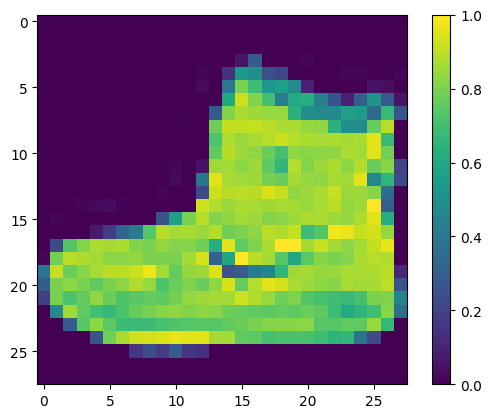

In [261]:
#Preprocess the data and change the scale of the values and show the image
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure()
plt.imshow(train_images[0]) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

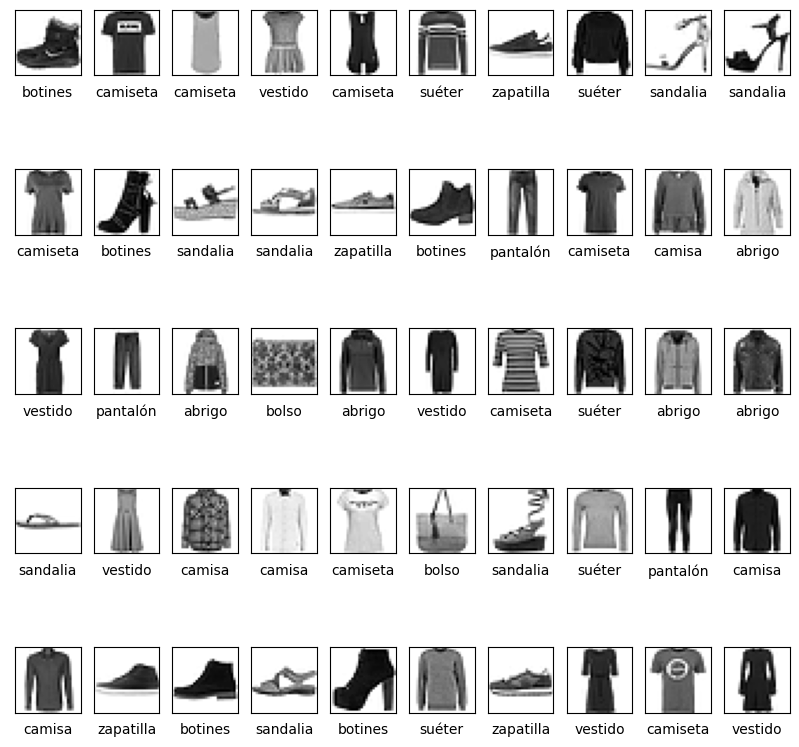

In [262]:
#Show all the images
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [263]:
#Config and create neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [264]:
#Show configuration of the neural network
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 15)                11775     
                                                                 
 dense_21 (Dense)            (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [265]:
#Compilar model, about the optimizer, loss function and metrics
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [266]:
#Train the model
#Save  weights
checkpoint_path = "checkpoints/check"
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(train_images, 
            train_labels, 
            epochs=50,
            validation_data = (test_images, test_labels),
            callbacks=[cp_callbacks, tensorboard_callback])
#Into the folder logs/fit/20200420-174504
#tensorboard --logdir logs/fit

Epoch 1/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.6398 - accuracy: 0.7808
Epoch 1: saving model to checkpoints\check
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6389 - accuracy: 0.7811 - val_loss: 0.5007 - val_accuracy: 0.8200
Epoch 2/50
1856/1875 [============================>.] - ETA: 0s - loss: 0.4448 - accuracy: 0.8430
Epoch 2: saving model to checkpoints\check
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4449 - accuracy: 0.8429 - val_loss: 0.4642 - val_accuracy: 0.8351
Epoch 3/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.4151 - accuracy: 0.8531
Epoch 3: saving model to checkpoints\check
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4153 - accuracy: 0.8532 - val_loss: 0.4371 - val_accuracy: 0.8439
Epoch 4/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.4009 - accuracy: 0.8566
Epoch 4: saving model to checkpoints\check
1875/1875 [==========================

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4133 - accuracy: 0.8545 - 695ms/epoch - 2ms/step

Test accuracy: 0.8544999957084656


In [ ]:
#Make predictions
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([5.6354827e-05, 1.1408489e-09, 7.2643343e-05, 2.6412004e-06,
       3.9939190e-05, 8.1886157e-02, 2.2484080e-03, 1.3361780e-01,
       6.1529139e-03, 7.7592313e-01], dtype=float32)

In [ ]:
#Show the prediction i'm speaking about tag or columns names or  features
np.argmax(predictions[0])

9

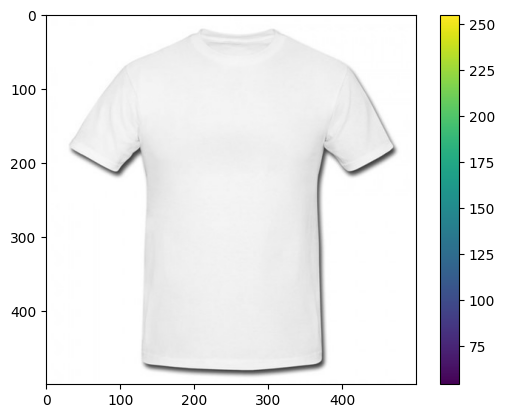

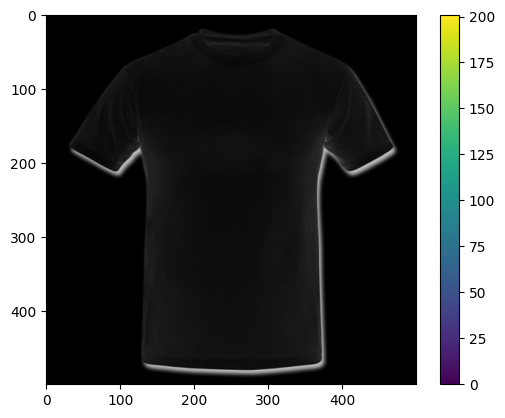

In [ ]:
#Predict images from internet
response = requests.get('https://sublitextil.com.ar/wp-content/uploads/2019/01/Remera-sublimar-hombre-.jpg')
img = Image.open(BytesIO(response.content))
np_img = np.array(img)
#Show image
plt.figure()
plt.imshow(np_img) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

#Invert the image
np_img = 255 - np_img
#Show image
plt.figure()
plt.imshow(np_img) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
np_img.shape

(500, 500, 3)

In [ ]:
#We have an image with 3 dimensions, we need to convert image  to color gray
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

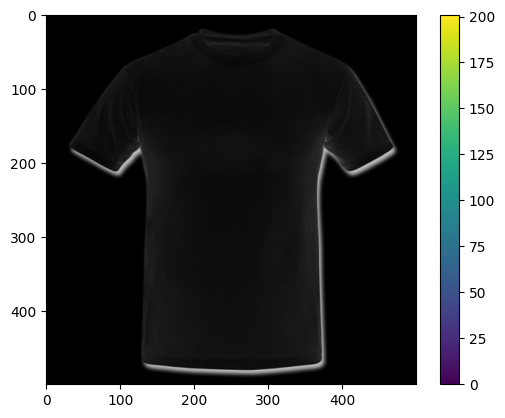

In [ ]:
bw_image = rgb2gray(np_img)
plt.figure()
plt.imshow(np_img) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
bw_image.shape

(500, 500)

In [ ]:
#Resize the image
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

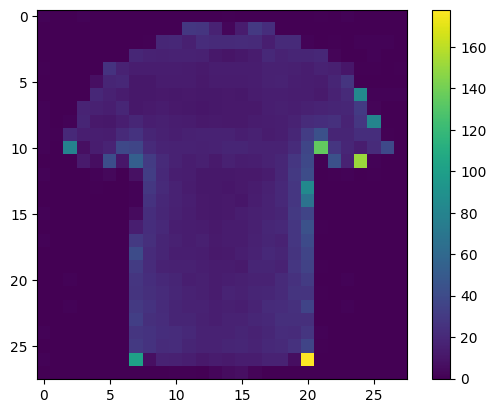

In [ ]:
plt.figure()
plt.imshow(res) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

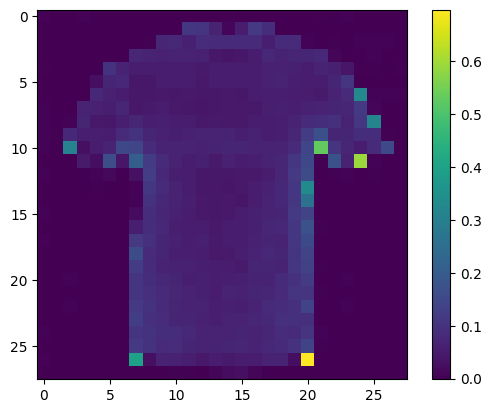

In [ ]:
res = res / 255.0
plt.figure()
plt.imshow(res) #show the first image
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Predict the image adn create arrat, in the end we add image into the array
#x =  np.array([res]) OPTIMIZATED
#x.shape
x =  np.zeros((1,28,28))
x.shape
x[0] = np.array(res)

In [ ]:
predictions = model.predict(x) #predict Show one image
predictions[0]

1/1 [==============================] - 0s 34ms/step


array([0.35589266, 0.01385053, 0.0999549 , 0.11191328, 0.0477182 ,
       0.08387843, 0.19248752, 0.00810281, 0.08250862, 0.00369307],
      dtype=float32)

Text(0.5, 1.0, 'Prediction')

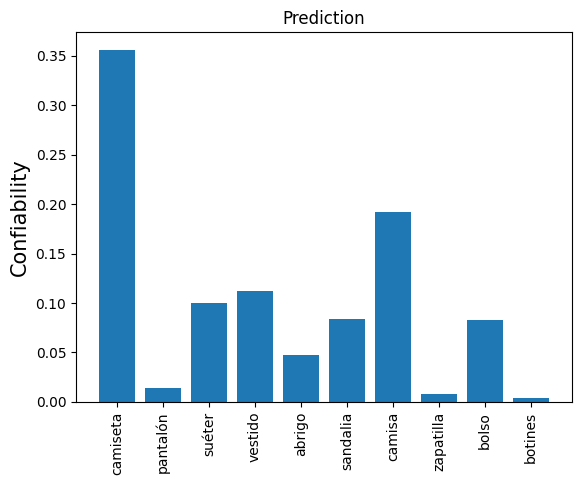

In [ ]:
#Show the predciton
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiability', fontsize=15)
plt.xticks(index, class_names, fontsize=10, rotation=90)
plt.title('Prediction')


In [ ]:
#We create a function to predict the image
#Compile the model
#we need to load the weights
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
#Load the weights
model2.load_weights(checkpoint_path)

In [ ]:
loss , acc = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.4133 - accuracy: 0.8545 - 497ms/epoch - 2ms/step


In [ ]:
acc

0.8544999957084656

0.8544999957084656